In [1]:
from google.colab import files
uploaded=files.upload()

Saving Iris.csv to Iris.csv


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [17]:
X = df.drop(columns=['Id', 'Species'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

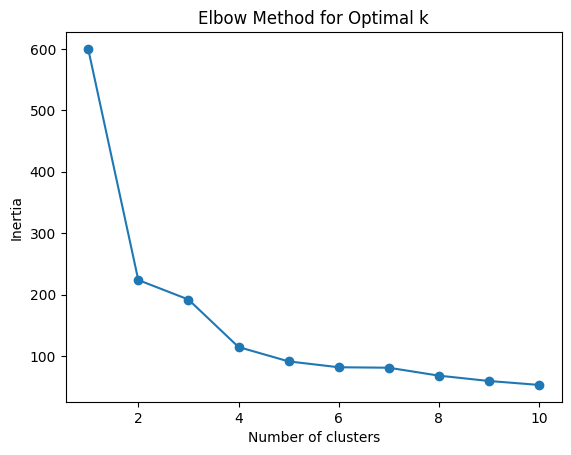

In [24]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

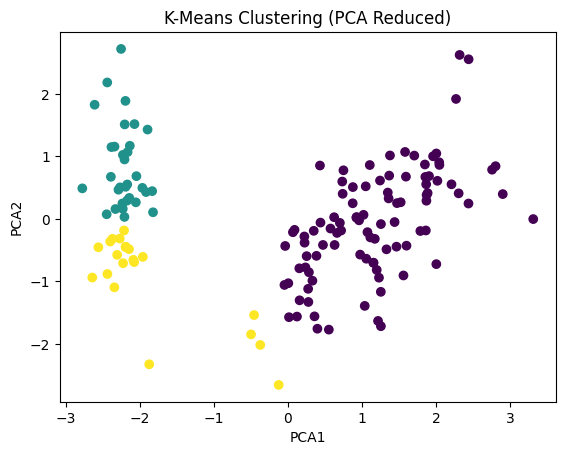

In [19]:
# Apply KMeans with optimal clusters (say, 3)
kmeans = KMeans(n_clusters=3, random_state=42)
k_labels = kmeans.fit_predict(X_scaled)

# Visualize clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=k_labels, cmap='viridis')
plt.title('K-Means Clustering (PCA Reduced)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

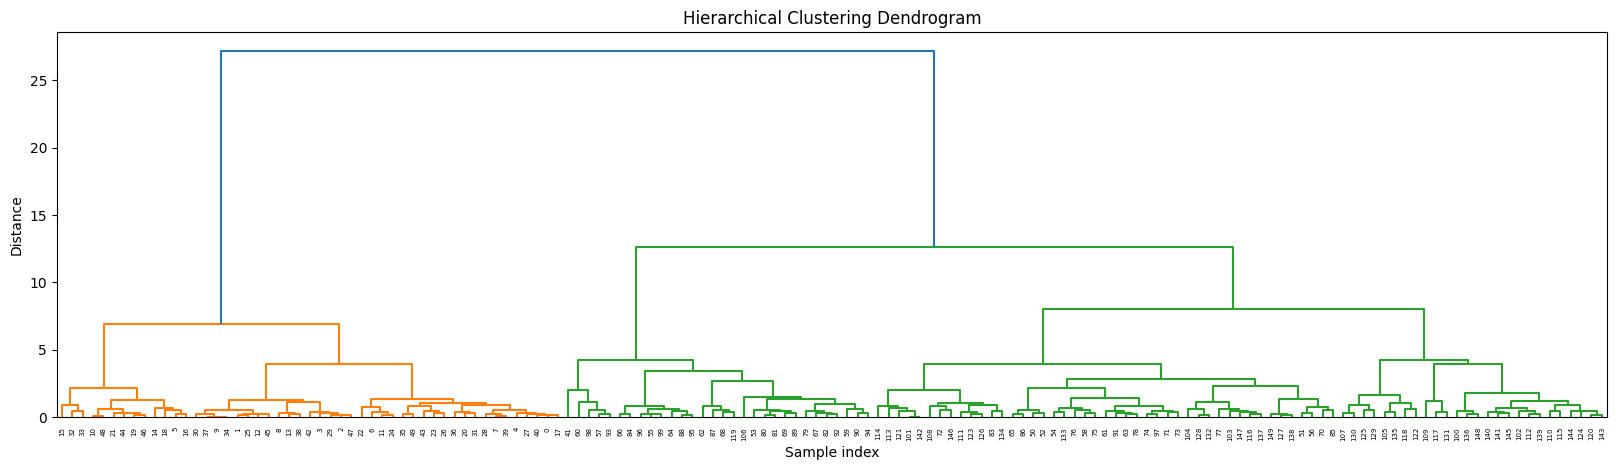

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_matrix = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(20, 5))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

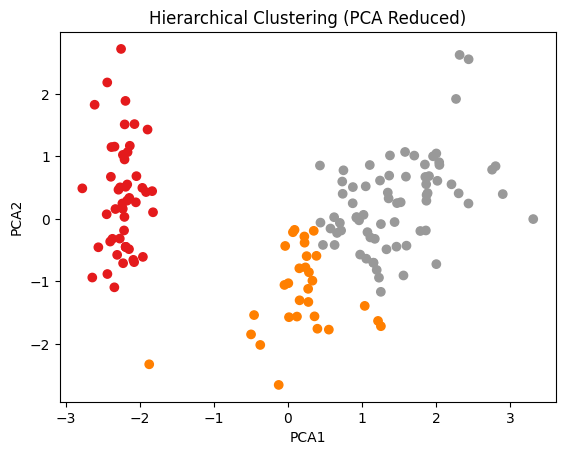

In [21]:
from scipy.cluster.hierarchy import fcluster

# Get cluster labels (e.g., 3 clusters)
h_labels = fcluster(linkage_matrix, 3, criterion='maxclust')

# Plot clusters using PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=h_labels, cmap='Set1')
plt.title('Hierarchical Clustering (PCA Reduced)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()